# HR ANALYTICS

## PROBLEM STATEMENT :
Organizations encounter various challenges in managing workforce data, including missing or incomplete datasets, understanding key trends, and optimizing critical HR metrics such as employee retention, productivity, and satisfaction. The lack of clear insights often hinders effective decision-making, leading to inefficiencies in workforce management and strategy. This project focuses on addressing these challenges through comprehensive Exploratory Data Analysis (EDA) on HR data. The primary objectives include identifying and addressing missing data, visualizing workforce trends through advanced plotting techniques, analyzing employee attrition patterns, and deriving actionable insights to optimize key HR metrics. By leveraging data visualization and statistical analysis, the project aims to support data-driven decision-making, enabling organizations to enhance employee experience and improve overall organizational performance.

### IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### IMPORTING DATASET

In [7]:
df = pd.read_csv('HR_analytics.csv', encoding = 'latin - 1')

In [8]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,NaN,0.0,NaN,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
10867,0.80,0.72,4.0,173.0,3.0,0.0,0.0,0.0,accounting,low
10868,0.43,0.71,3.0,186.0,2.0,0.0,0.0,0.0,accounting,NaN
10869,0.87,0.71,4.0,157.0,2.0,0.0,0.0,0.0,hr,medium
10870,0.63,0.75,4.0,175.0,4.0,0.0,0.0,0.0,hr,medium


In [9]:
df.head()  # Returns the First 5 rows in the dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,NaN,0.0,NaN,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low


### Renaming the columns

In [11]:
# Renaming the columns
df.rename(columns={
    'satisfaction_level': 'Satisfaction',
    'last_evaluation': 'Last_Eval',
    'number_project': 'Num_Projects',
    'average_montly_hours': 'Avg_Monthly_Hours',
    'time_spend_company': 'Tenure(Years)',
    'Work_accident': 'Work_Accident',
    'left': 'Left',
    'promotion_last_5years': 'Promotion(5 Years)',
    'Department': 'Dept',
    'salary': 'Salary'
}, inplace=True)

In [12]:
df.head()

,Satisfaction,Last_Eval,Num_Projects,Avg_Monthly_Hours,Tenure(Years),Work_Accident,Left,Promotion(5 Years),Dept,Salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,NaN,0.0,NaN,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low


In [13]:
df.tail()  # Returns the Last 5 rows in the dataset

,Satisfaction,Last_Eval,Num_Projects,Avg_Monthly_Hours,Tenure(Years),Work_Accident,Left,Promotion(5 Years),Dept,Salary
10867,0.80,0.72,4.0,173.0,3.0,0.0,0.0,0.0,accounting,low
10868,0.43,0.71,3.0,186.0,2.0,0.0,0.0,0.0,accounting,NaN
10869,0.87,0.71,4.0,157.0,2.0,0.0,0.0,0.0,hr,medium
10870,0.63,0.75,4.0,175.0,4.0,0.0,0.0,0.0,hr,medium
10871,0.58,0.48,3.0,135.0,3.0,1.0,0.0,0.0,hr,medium


In [14]:
df.shape  #Return a tuple representing the dimensionality of the DataFrame.

(10872, 10)

In [15]:
df.dtypes  #Return the dtypes in the DataFrame.

Satisfaction          float64
Last_Eval             float64
Num_Projects          float64
Avg_Monthly_Hours     float64
Tenure(Years)         float64
Work_Accident         float64
Left                  float64
Promotion(5 Years)    float64
Dept                   object
Salary                 object
dtype: object

In [16]:
df.describe()  #Generate descriptive statistics.

,Satisfaction,Last_Eval,Num_Projects,Avg_Monthly_Hours,Tenure(Years),Work_Accident,Left,Promotion(5 Years)
count,10860.000000,10859.000000,10862.000000,10854.000000,10863.000000,10864.000000,10865.000000,10868.000000
mean,0.626454,0.716925,3.802154,200.579418,3.244684,0.151233,0.183617,0.009937
std,0.243426,0.168992,1.180818,49.000688,1.061523,0.358293,0.387189,0.099195
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.470000,0.560000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,244.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.000000


In [17]:
df.info()  #Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10872 entries, 0 to 10871
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Satisfaction        10860 non-null  float64
 1   Last_Eval           10859 non-null  float64
 2   Num_Projects        10862 non-null  float64
 3   Avg_Monthly_Hours   10854 non-null  float64
 4   Tenure(Years)       10863 non-null  float64
 5   Work_Accident       10864 non-null  float64
 6   Left                10865 non-null  float64
 7   Promotion(5 Years)  10868 non-null  float64
 8   Dept                10851 non-null  object 
 9   Salary              10860 non-null  object 
dtypes: float64(8), object(2)
memory usage: 849.5+ KB


# DATA CLEANING

In [19]:
df.isnull().sum()

Satisfaction          12
Last_Eval             13
Num_Projects          10
Avg_Monthly_Hours     18
Tenure(Years)          9
Work_Accident          8
Left                   7
Promotion(5 Years)     4
Dept                  21
Salary                12
dtype: int64

In [20]:
df.isnull().sum() / len(df) * 100

Satisfaction          0.110375
Last_Eval             0.119573
Num_Projects          0.091979
Avg_Monthly_Hours     0.165563
Tenure(Years)         0.082781
Work_Accident         0.073584
Left                  0.064386
Promotion(5 Years)    0.036792
Dept                  0.193157
Salary                0.110375
dtype: float64

In [21]:
df['Satisfaction'].isnull().sum()  #Returns the number of missing values in the column.

12

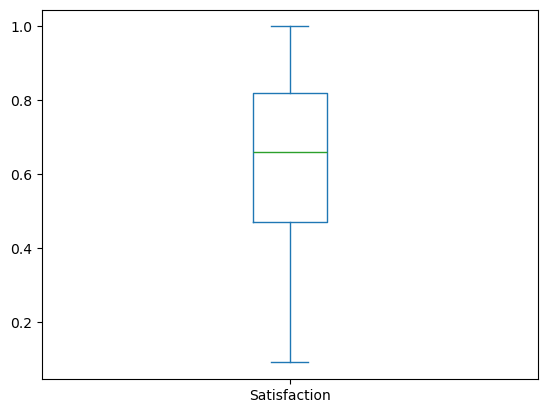

In [22]:
df['Satisfaction'].plot(kind = 'box') #Box plot to represent outliers.
plt.show()

In [23]:
df['Satisfaction'].fillna(df['Satisfaction'].mean(), inplace = True)  #Imputing the missing values with mean.

In [24]:
df['Satisfaction'].isnull().sum() #Check the missing values after filling.

0

In [25]:
df['Satisfaction'] = df['Satisfaction'] * 10  #Scaling the values.

In [26]:
df['Last_Eval'].isnull().sum()  #Returns the number of missing values in the column.

13

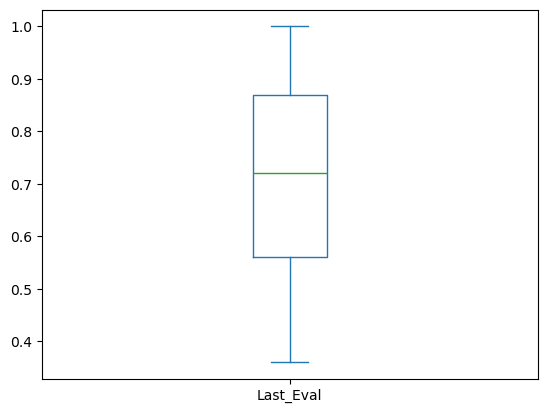

In [27]:
df['Last_Eval'].plot(kind='box')  #Box plot to represent outliers.
plt.show()

In [28]:
df['Last_Eval'].fillna(df['Last_Eval'].median(), inplace = True)  #Imputing the missing values with mean.

In [29]:
df['Last_Eval'] = df['Last_Eval'] * 10  #Scaling the values.

In [30]:
df['Num_Projects'].isnull().sum()  #Returns the number of missing values in the column.

10

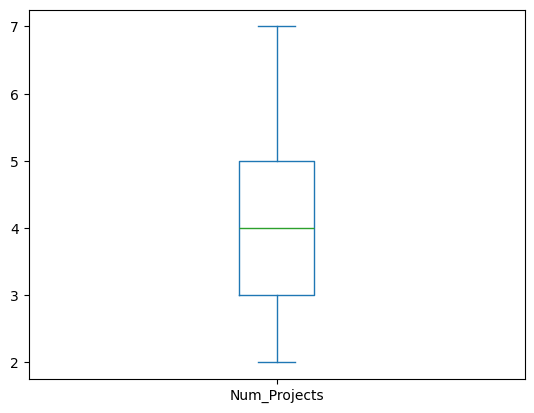

In [31]:
df['Num_Projects'].plot(kind='box')  #Box plot to represent outliers.
plt.show()

In [32]:
df['Num_Projects'].fillna(df['Num_Projects'].median(), inplace = True)  #Imputing the missing values with mean.

In [33]:
df['Num_Projects'] = df['Num_Projects'].astype(int)  #Convert the data type to integer.

In [34]:
df['Avg_Monthly_Hours'].isnull().sum()  #Returns the number of missing values in the column.

18

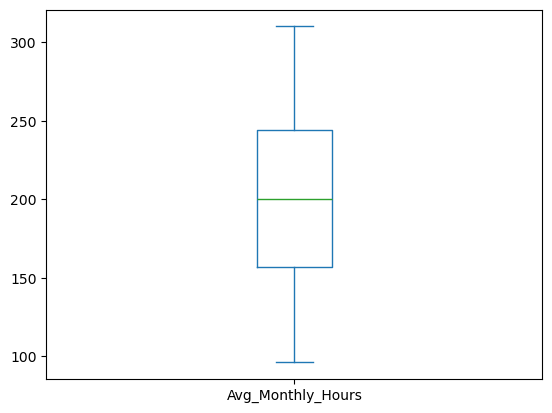

In [35]:
df['Avg_Monthly_Hours'].plot(kind='box')  # Box plot to represent outliers.
plt.show()

In [36]:
df['Avg_Monthly_Hours'].fillna(df['Avg_Monthly_Hours'].mean(), inplace = True)  #Imputing the missing values with mean.

In [37]:
df['Avg_Monthly_Hours'] = df['Avg_Monthly_Hours'].astype(int)  #Convert the data type to integer.

In [38]:
df['Tenure(Years)'].isnull().sum()  #Returns the number of missing values in the column.

9

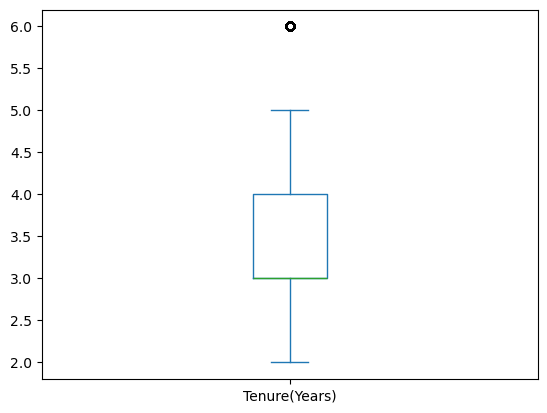

In [39]:
df['Tenure(Years)'].plot(kind='box')  #Box plot to represent outliers.
plt.show()

## Treating Outliers

In [41]:
Q1 = df['Tenure(Years)'].quantile(0.25)
Q3 = df['Tenure(Years)'].quantile(0.75)
IQR = Q3 - Q1

In [42]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [43]:
df['Tenure(Years)'] = df['Tenure(Years)'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

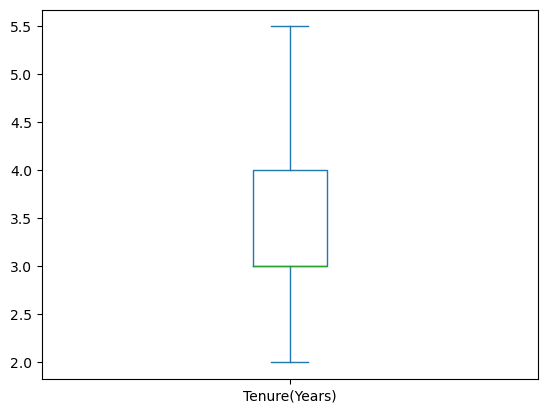

In [44]:
df['Tenure(Years)'].plot(kind='box')  #Box plot to represent outliers.
plt.show()

In [45]:
df['Tenure(Years)'].fillna(df['Tenure(Years)'].mean(), inplace = True)  #Imputing the missing values with mean.

In [46]:
df['Tenure(Years)'] = df['Tenure(Years)'].astype(int)  #Convert the data type to integer.

In [47]:
df['Work_Accident'].isnull().sum()  #Returns the number of missing values in the column.

8

In [48]:
df['Work_Accident'] = df['Work_Accident'].replace({0: 'No', 1: 'Yes'})  #Replacing the values.

In [49]:
df['Work_Accident'] = df['Work_Accident'].fillna(df['Work_Accident'].mode()[0])  #Filling the missing values with mode.

In [50]:
df['Left'].isnull().sum()  #Returns the number of missing values in the column.

7

In [51]:
df['Left'] = df['Left'].replace({0: 'No', 1: 'Yes'})  #Replacing the values.

In [52]:
df['Left'] = df['Left'].fillna(df['Left'].mode()[0])  #Filling the missing values with mode.

In [53]:
df['Promotion(5 Years)'].isnull().sum()  #Check missing values after filling.

4

In [54]:
df['Promotion(5 Years)'] = df['Promotion(5 Years)'].replace({0: 'No', 1: 'Yes'})  #Replacing the values.

In [55]:
df['Promotion(5 Years)'] = df['Promotion(5 Years)'].fillna(df['Promotion(5 Years)'].mode()[0])

In [56]:
df['Dept'].isnull().sum()  #Returns the number of missing values in the column.

21

In [57]:
df['Dept'] = df['Dept'].fillna(df['Dept'].mode()[0])  # Filling missing values with mode

In [58]:
df['Salary'].isnull().sum()  #Returns the number of missing values in the column.

12

In [59]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mode()[0])

In [60]:
df['Salary'].isnull().sum()

0

## UNIVARIATE ANALYSIS

### Histogram

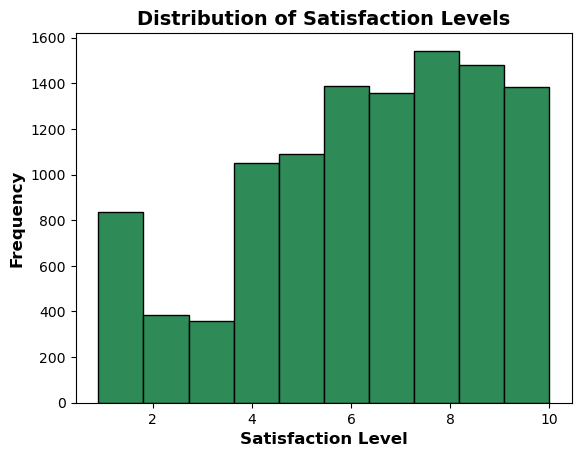

In [63]:
# Plotting a histogram of the 'satisfaction_level'.
plt.hist(df['Satisfaction'], bins=10, color='seagreen', edgecolor='black')
plt.title('Distribution of Satisfaction Levels', fontweight = 'bold', fontsize=14)
plt.xlabel('Satisfaction Level', fontweight = 'bold', fontsize=12)
plt.ylabel('Frequency', fontweight = 'bold', fontsize=12)
plt.show()

### Histogram with KDE

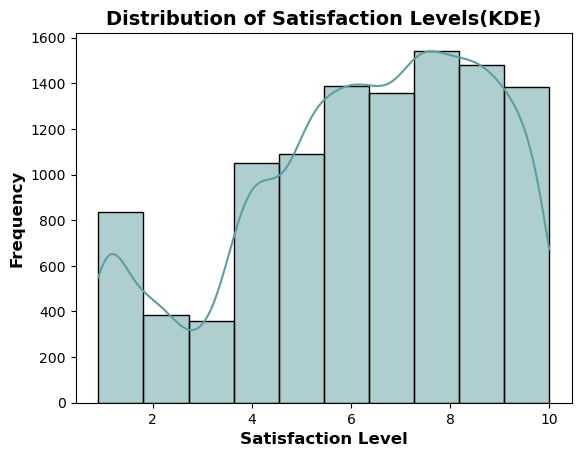

In [65]:
# Distribution of the 'satisfaction_level' column with KDE.
sns.histplot(df['Satisfaction'], bins=10, color='cadetblue', edgecolor='black', kde=True)
plt.title('Distribution of Satisfaction Levels(KDE)', fontweight = 'bold', fontsize=14)
plt.xlabel('Satisfaction Level', fontweight = 'bold', fontsize=12)
plt.ylabel('Frequency', fontweight = 'bold', fontsize=12)
plt.show()

In [66]:
df['Dept'].value_counts()  #Counts the number of occurrences of each unique value in the 'Department' column.

Dept
sales          2900
technical      2126
support        1699
IT              865
RandD           659
marketing       596
accounting      585
hr              579
product_mng     574
management      289
Name: count, dtype: int64

### Pie chart

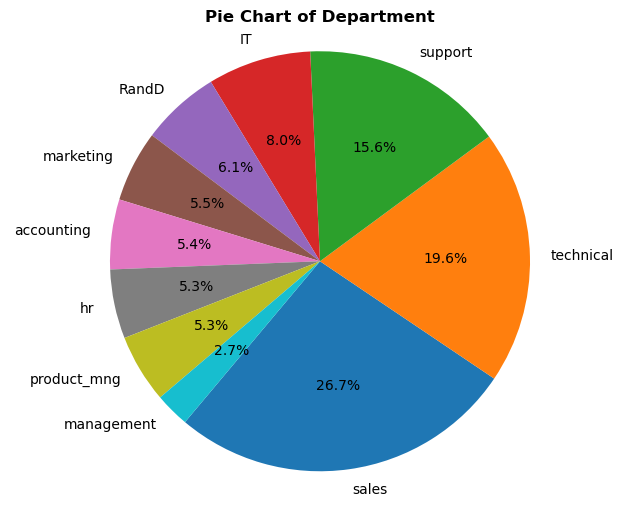

In [68]:
# Distribution of employees across different departments.
plt.figure(figsize=(8, 6))
df['Dept'].value_counts().plot(kind='pie',
                                     autopct='%1.1f%%',
                                     startangle=230)
plt.title('Pie Chart of Department', fontweight='bold')
plt.axis('equal')
plt.ylabel('')
plt.show()

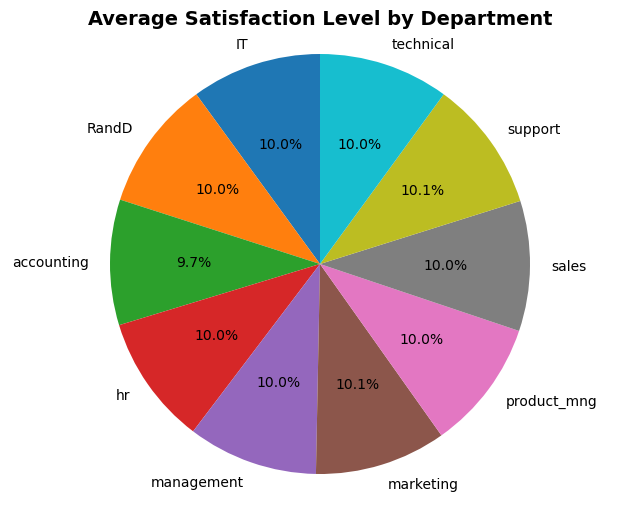

In [69]:
# Average satisfaction level by department.
satisfaction_by_dept = df.groupby('Dept')['Satisfaction'].mean()
plt.figure(figsize=(8, 6))
plt.pie(satisfaction_by_dept, labels=satisfaction_by_dept.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Satisfaction Level by Department', fontweight='bold', fontsize=14)
plt.axis('equal')
plt.show()

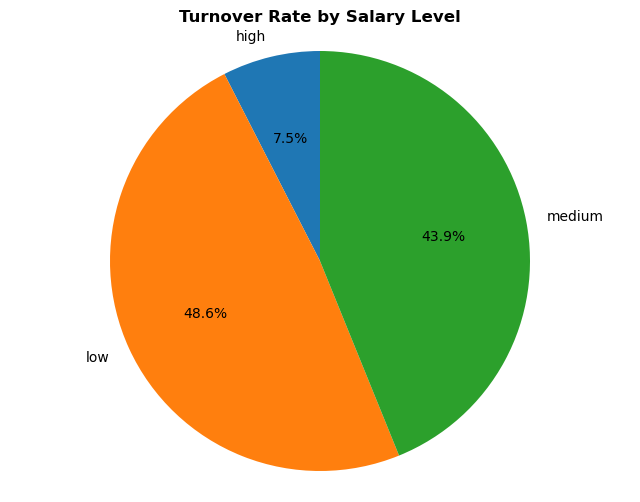

In [70]:
#Turnover rate by salary level.
turnover_by_salary = pd.crosstab(df['Salary'], df['Left']).sum(axis=1)
plt.figure(figsize=(8, 6))
plt.pie(turnover_by_salary, labels=turnover_by_salary.index, autopct='%1.1f%%', startangle=90)
plt.title('Turnover Rate by Salary Level', fontweight='bold')
plt.axis('equal')
plt.show()

### Donut Chart

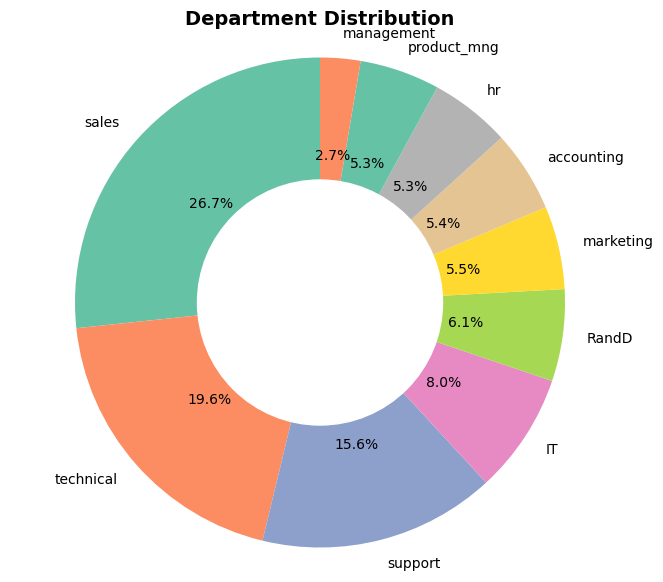

In [72]:
# Distribution of employees across different departments.
dept_counts = df['Dept'].value_counts()
plt.figure(figsize=(8, 7))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(dept_counts)))
plt.gca().add_artist(plt.Circle((0, 0), 0.5, color='white'))
plt.title('Department Distribution', fontweight = 'bold',fontsize=14)
plt.axis('equal')
plt.show()

### Bar chart

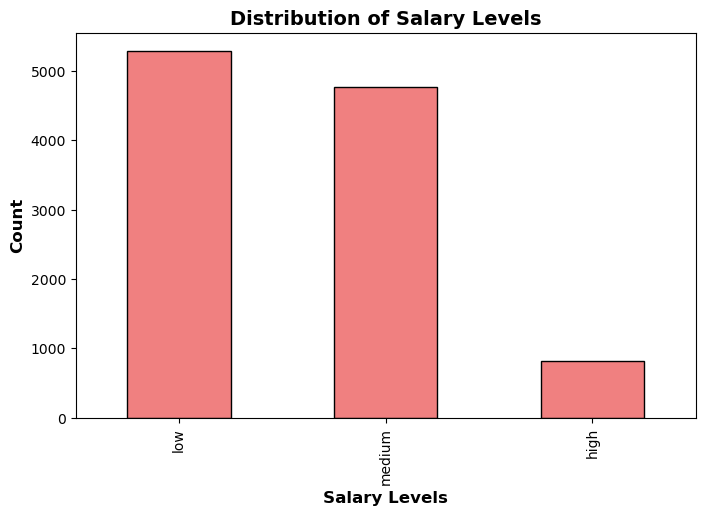

In [74]:
# Distribution of employees across different salary levels.
plt.figure(figsize=(8, 5))
df['Salary'].value_counts().plot(kind='bar',
                                 color='lightcoral',
                                 edgecolor='black')
plt.title('Distribution of Salary Levels', fontweight = 'bold', fontsize=14)
plt.xlabel('Salary Levels', fontweight = 'bold', fontsize=12)
plt.ylabel('Count', fontweight = 'bold', fontsize=12)
plt.show()

### Box Plot

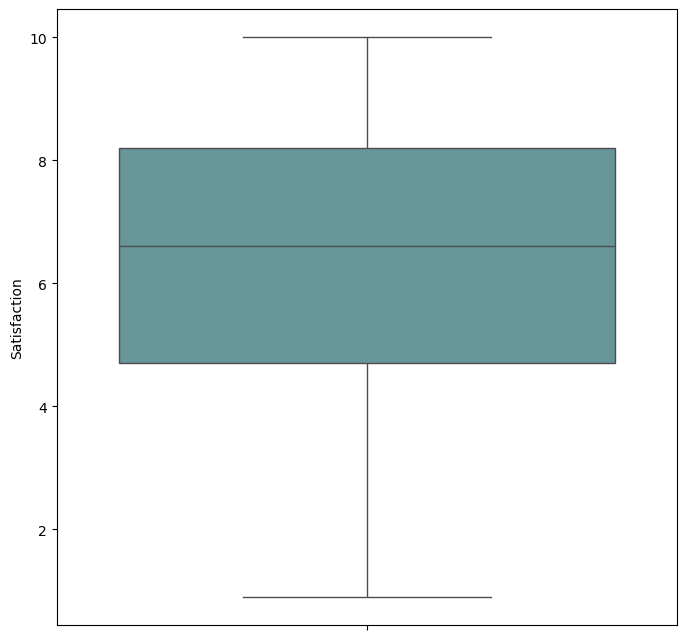

In [76]:
# Box Plot to demonstrate the values in Satisfaction column.
plt.figure(figsize=(8, 8))
sns.boxplot(df['Satisfaction'], color='cadetblue')
plt.show()

### Density Plot

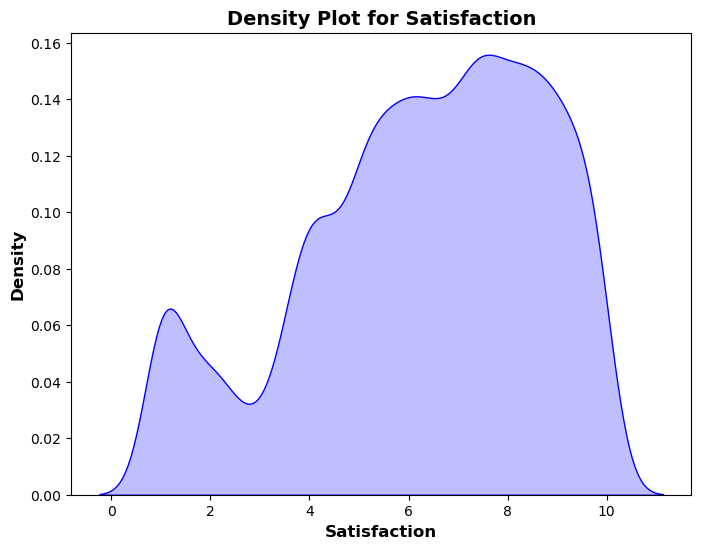

In [78]:
# Density plot :  'Satisfaction'
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Satisfaction'], fill=True, color='blue')
plt.title('Density Plot for Satisfaction', fontweight = 'bold', fontsize=14)
plt.xlabel('Satisfaction', fontweight = 'bold', fontsize=12)
plt.ylabel('Density', fontweight = 'bold', fontsize=12)
plt.show()

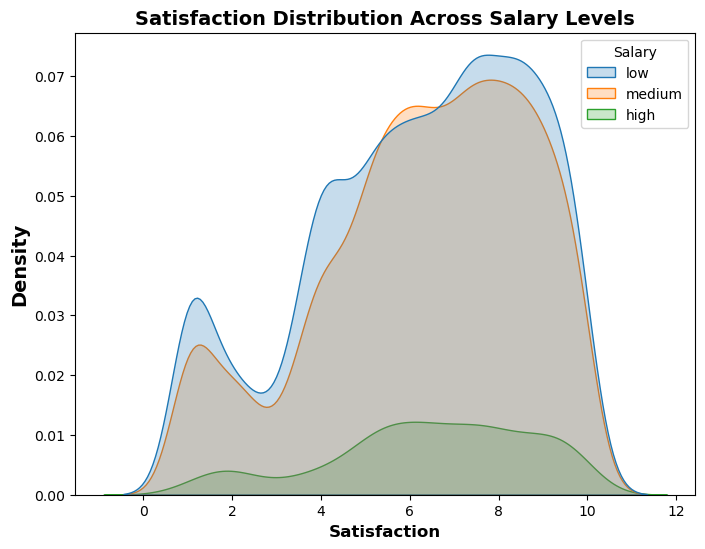

In [79]:
# To compare distributions of Satisfaction across Salary levels:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Satisfaction', hue='Salary', fill=True)
plt.title('Satisfaction Distribution Across Salary Levels', fontweight = 'bold', fontsize=14)
plt.xlabel('Satisfaction', fontweight = 'bold', fontsize=12)
plt.ylabel('Density', fontweight = 'bold', fontsize=14)
plt.show()

## BIVARIATE ANALYSIS

### Scatter Plot (numeric vs. numeric)

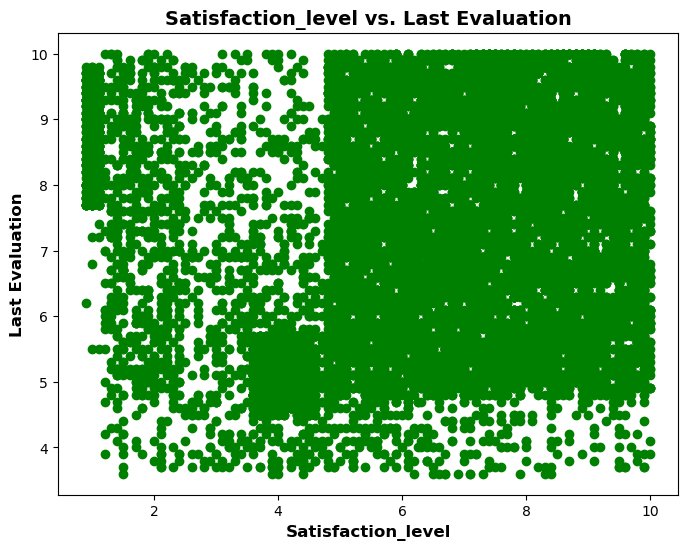

In [82]:
# Scatter Plot: Satisfaction vs. Last_Eval
plt.figure(figsize=(8, 6))
plt.scatter(df['Satisfaction'], df['Last_Eval'], color='green')
plt.title('Satisfaction_level vs. Last Evaluation', fontweight = 'bold', fontsize=14)
plt.xlabel('Satisfaction_level', fontweight = 'bold', fontsize=12)
plt.ylabel('Last Evaluation', fontweight = 'bold', fontsize=12)
plt.show()

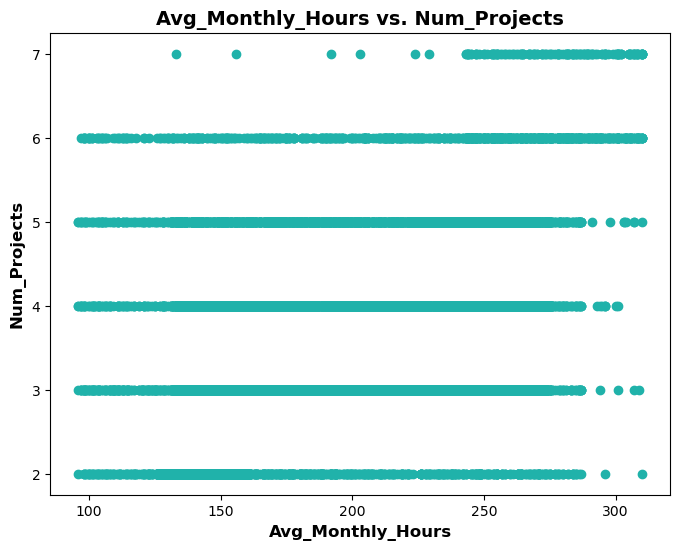

In [83]:
# Scatter Plot: Avg_Monthly_Hours vs. Num_Projects
plt.figure(figsize=(8, 6))
plt.scatter(df['Avg_Monthly_Hours'], df['Num_Projects'], color='lightseagreen')
plt.title('Avg_Monthly_Hours vs. Num_Projects', fontweight = 'bold', fontsize=14)
plt.xlabel('Avg_Monthly_Hours', fontweight = 'bold', fontsize=12)
plt.ylabel('Num_Projects', fontweight = 'bold', fontsize=12)
plt.show()

### Box Plot (numeric vs. categorical)

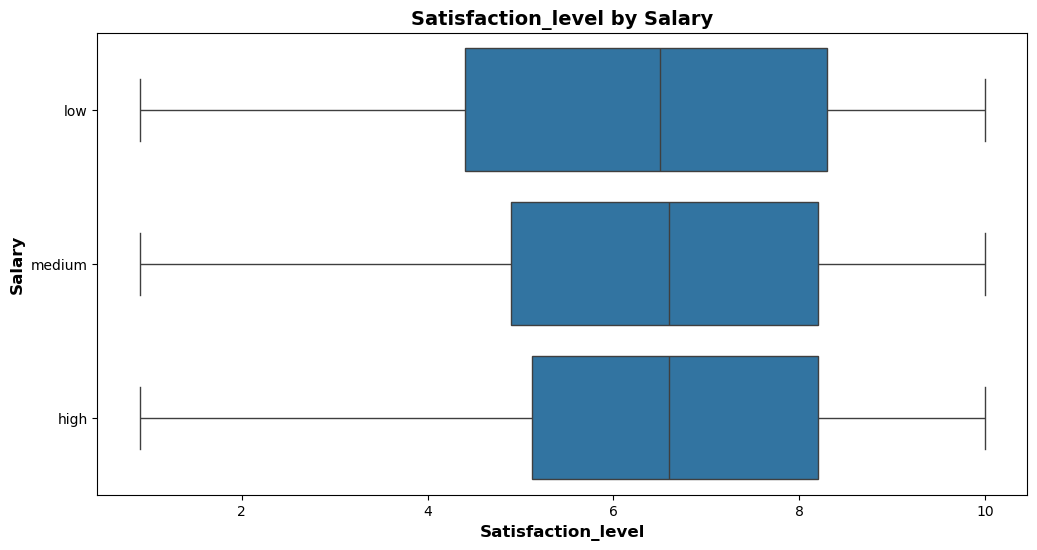

In [85]:
# Box Plot : Satisfaction_level by Salary.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Satisfaction', y='Salary', data=df)
plt.title('Satisfaction_level by Salary', fontweight = 'bold', fontsize=14)
plt.xlabel('Satisfaction_level', fontweight = 'bold', fontsize=12)
plt.ylabel('Salary', fontweight = 'bold', fontsize=12)
plt.show()

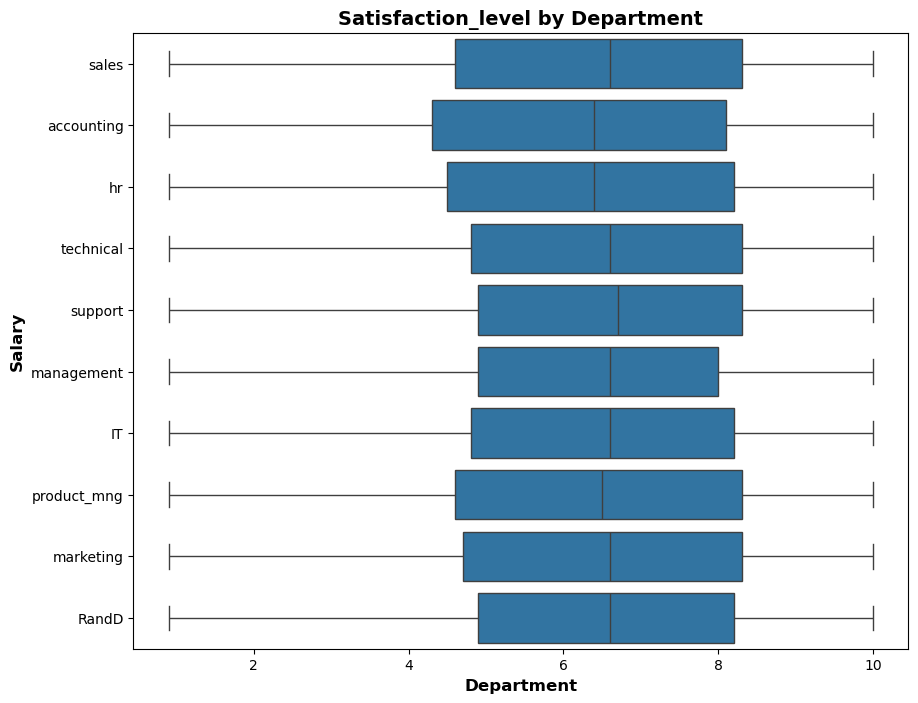

In [86]:
# Box Plot : Satisfaction_level by Department.
plt.figure(figsize=(10, 8))
sns.boxplot(x='Satisfaction', y='Dept', data=df)
plt.title('Satisfaction_level by Department', fontweight = 'bold', fontsize=14)
plt.xlabel('Department', fontweight = 'bold', fontsize=12)
plt.ylabel('Salary', fontweight = 'bold', fontsize=12)
plt.show()

### Histogram (Bivariate)

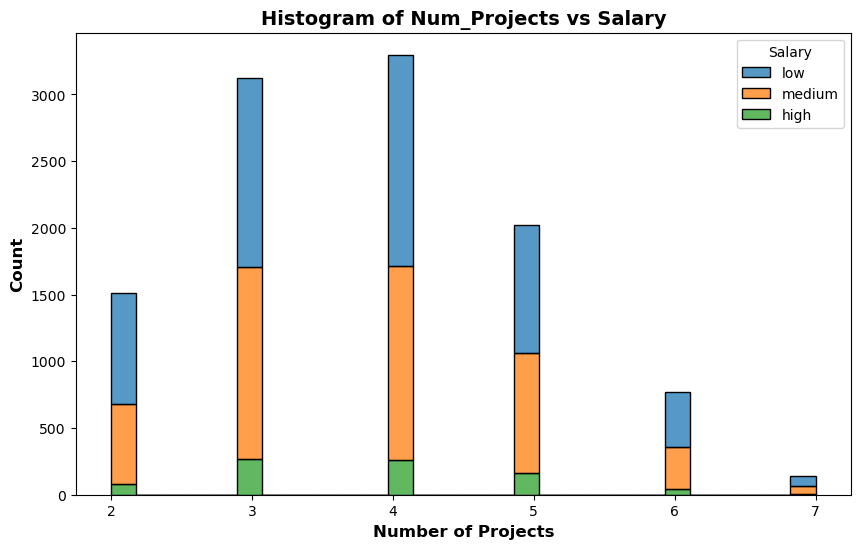

In [88]:
# Histogram to show the variations in Salary vs. Number of projects.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Num_Projects', hue='Salary', multiple='stack', palette='tab10')
plt.title('Histogram of Num_Projects vs Salary', fontweight = 'bold', fontsize=14)
plt.xlabel('Number of Projects', fontweight = 'bold', fontsize=12)
plt.ylabel('Count', fontweight = 'bold', fontsize=12)
plt.show()

### Violin Plot

/var/folders/qs/pfl_144j53d5bnww5fxsw9c40000gn/T/ipykernel_6455/3034049309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Work_Accident', y='Tenure(Years)', data=df, palette='Dark2')


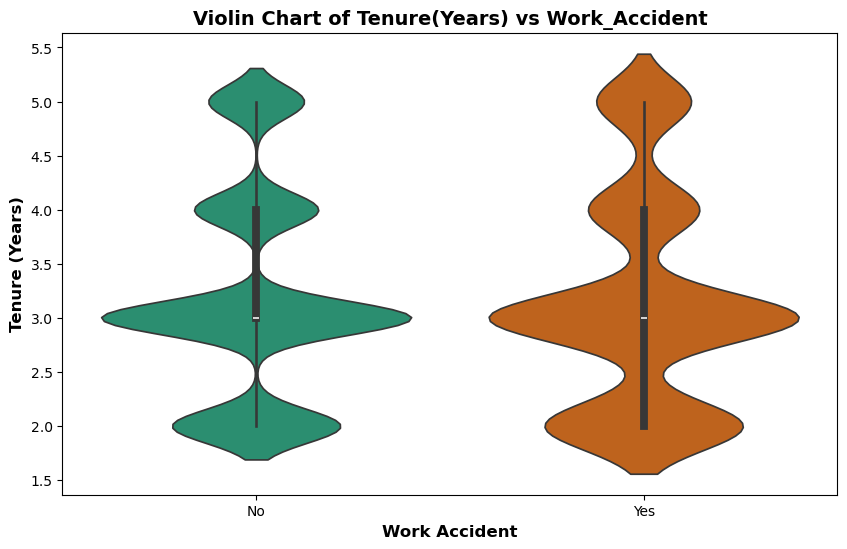

In [90]:
# Violin plot shows tenure distribution across work accident categories.
plt.figure(figsize=(10, 6))
sns.violinplot(x='Work_Accident', y='Tenure(Years)', data=df, palette='Dark2')
plt.title('Violin Chart of Tenure(Years) vs Work_Accident', fontweight = 'bold', fontsize=14)
plt.xlabel('Work Accident', fontweight = 'bold', fontsize=12)
plt.ylabel('Tenure (Years)', fontweight = 'bold', fontsize=12)
plt.show()

### Line Charts

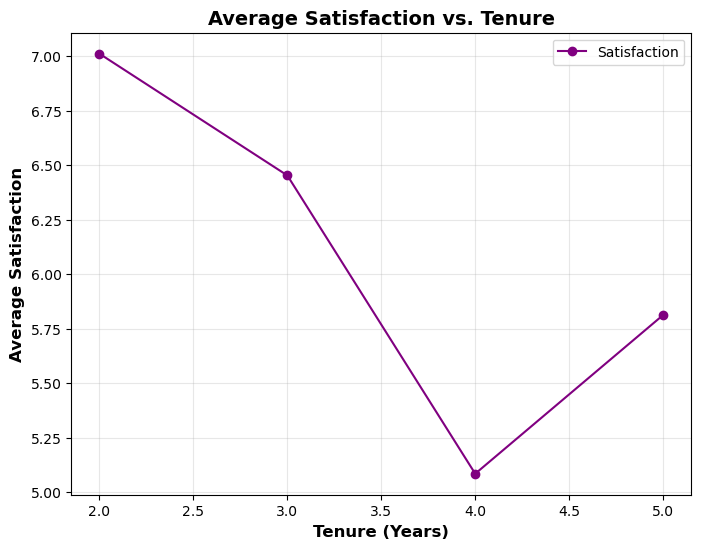

In [92]:
#Line chart: Satisfaction Trends over Tenure
tenure_satisfaction = df.groupby('Tenure(Years)')['Satisfaction'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.plot(tenure_satisfaction['Tenure(Years)'], tenure_satisfaction['Satisfaction'], marker='o', color='purple', label='Satisfaction')
plt.title('Average Satisfaction vs. Tenure', fontweight = 'bold', fontsize=14)
plt.xlabel('Tenure (Years)', fontweight = 'bold', fontsize=12)
plt.ylabel('Average Satisfaction', fontweight = 'bold', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## MULTIVARIATE ANALYSIS

### Heatmap (Correlation between numeric variables)

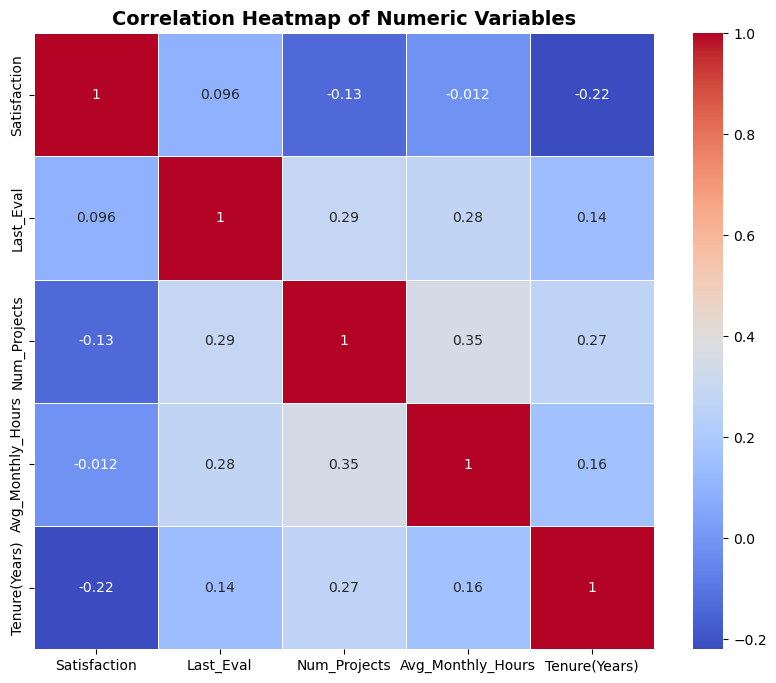

In [95]:
# Heatmap : Correlation Heatmap of Numeric Variables.
numeric_cols = ['Satisfaction', 'Last_Eval', 'Num_Projects', 'Avg_Monthly_Hours', 'Tenure(Years)']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables', fontweight = 'bold', fontsize=14)
plt.show()

### Histogram (Multivariate)

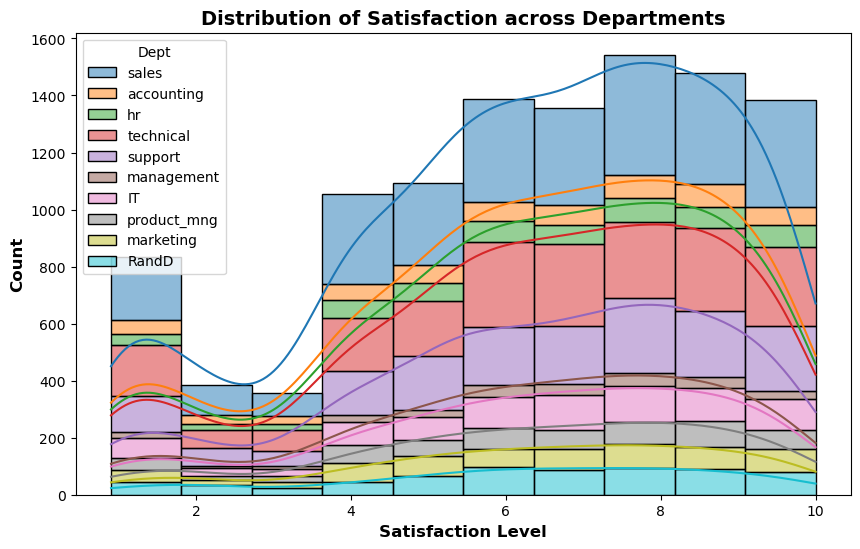

In [97]:
# Distribution of satisfaction levels across departments with a stacked histogram and KDE.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Satisfaction', hue='Dept', multiple='stack', bins=10, kde=True)
plt.title('Distribution of Satisfaction across Departments', fontsize=14, fontweight='bold')
plt.xlabel('Satisfaction Level', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

### Pair Plot

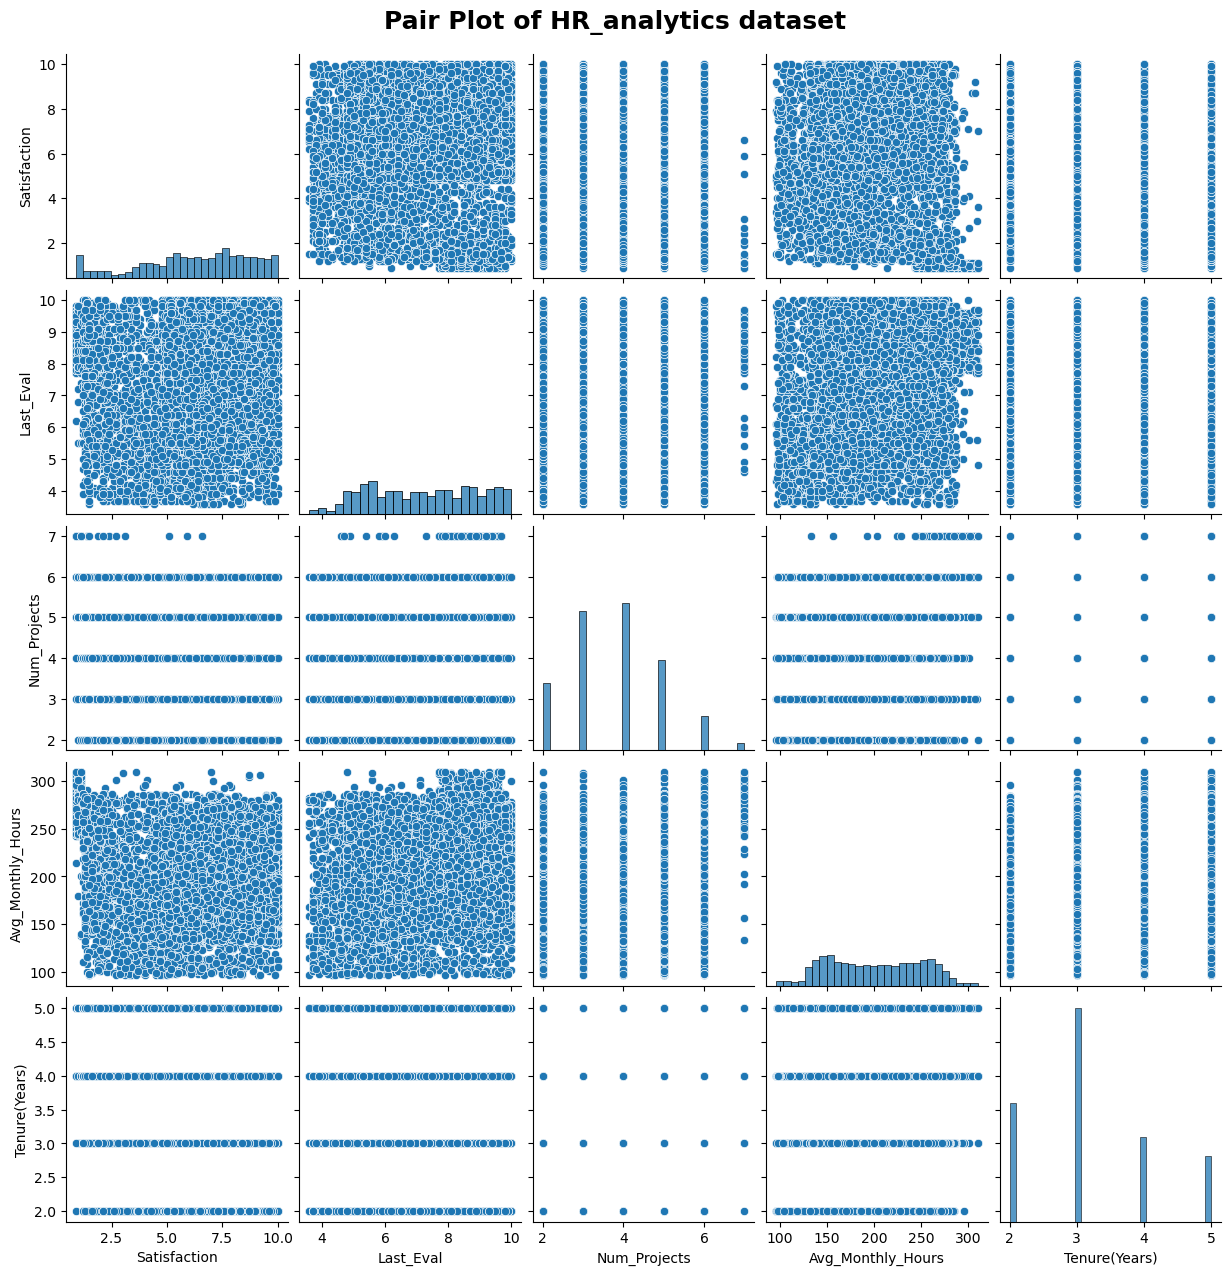

In [99]:
sns.pairplot(df)
plt.suptitle('Pair Plot of HR_analytics dataset', y=1.02, fontweight = 'bold', fontsize=18)
plt.show()

### Stacked Bar chart

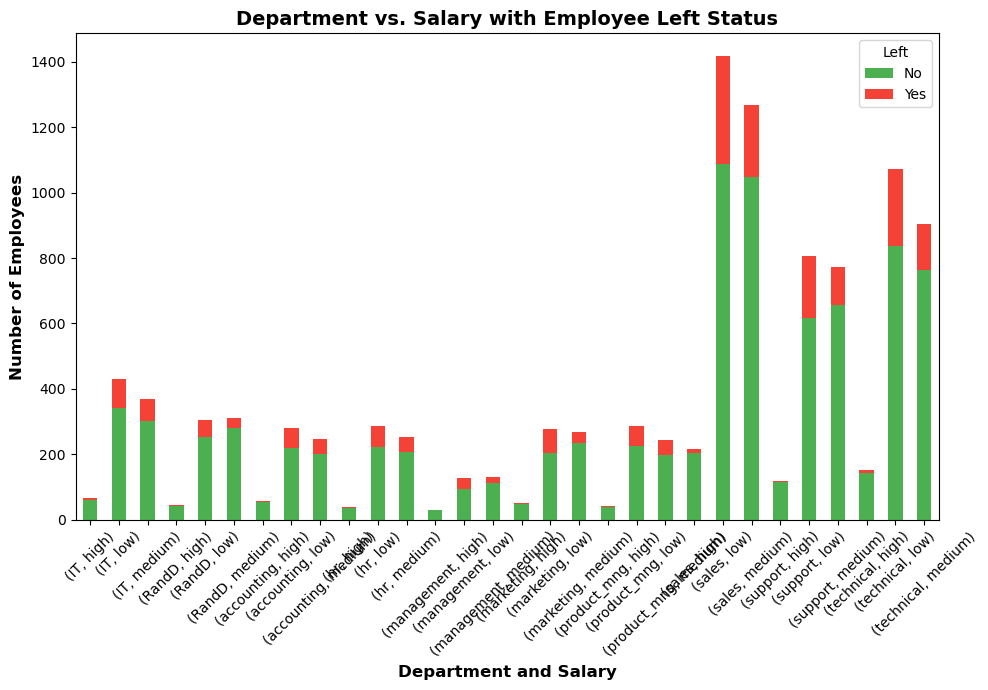

In [101]:
# Distribution of employees who left, segmented by department and salary.
crosstab = pd.crosstab(index=[df['Dept'], df['Salary']], columns=df['Left'])
crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#4CAF50', '#F44336'])
plt.title('Department vs. Salary with Employee Left Status', fontweight = 'bold', fontsize=14)
plt.xlabel('Department and Salary', fontweight = 'bold', fontsize=12)
plt.ylabel('Number of Employees', fontweight = 'bold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Salary with Employee Left Status')

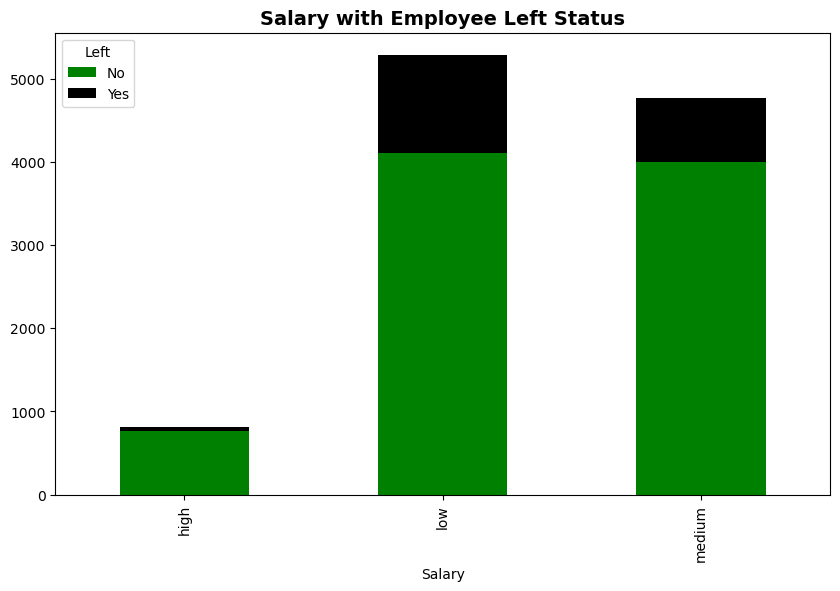

In [102]:
# Stacked Bar Chart : Turnover by Salary Level
pivot_turnover = df.pivot_table(index='Salary', columns='Left', aggfunc='size', fill_value=0)
pivot_turnover.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'black'])
plt.title('Salary with Employee Left Status', fontweight='bold', fontsize=14)

### Displot

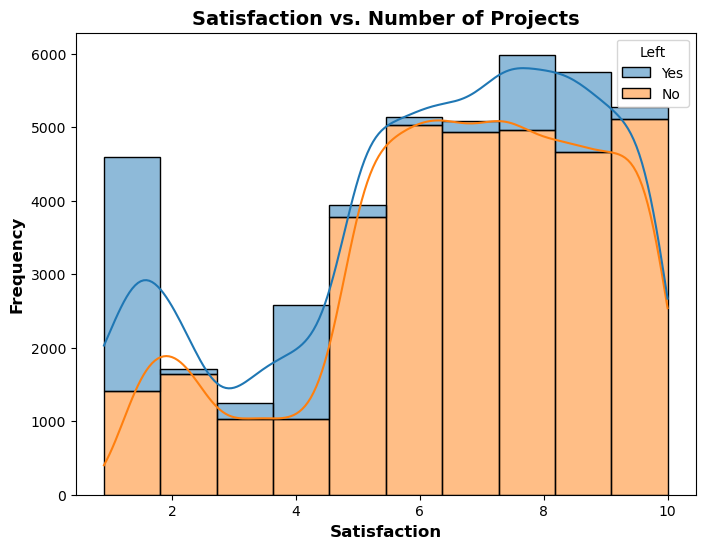

In [104]:
# Distplot shows the relationship between satisfaction and number of projects
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Satisfaction', hue='Left', weights=df['Num_Projects'], multiple='stack', kde=True, bins=10)
plt.title('Satisfaction vs. Number of Projects', fontweight='bold', fontsize=14)
plt.xlabel('Satisfaction', fontweight='bold', fontsize=12)
plt.ylabel('Frequency', fontweight='bold', fontsize=12)
plt.show()

### Q-Q Plot

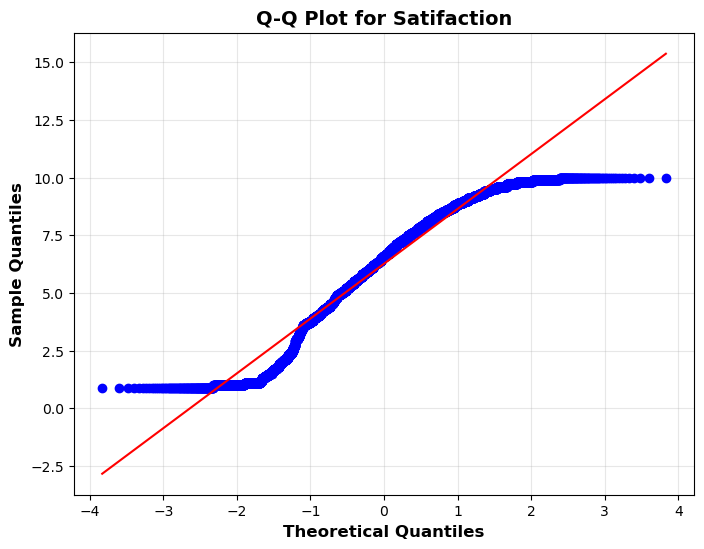

In [106]:
# Q-Q plot for 'Satisfaction' column.
variable = 'Satisfaction'
plt.figure(figsize=(8, 6))
stats.probplot(df[variable], dist="norm", plot=plt)
plt.title('Q-Q Plot for Satifaction', fontweight='bold', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontweight='bold', fontsize=12)
plt.ylabel('Sample Quantiles', fontweight='bold', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

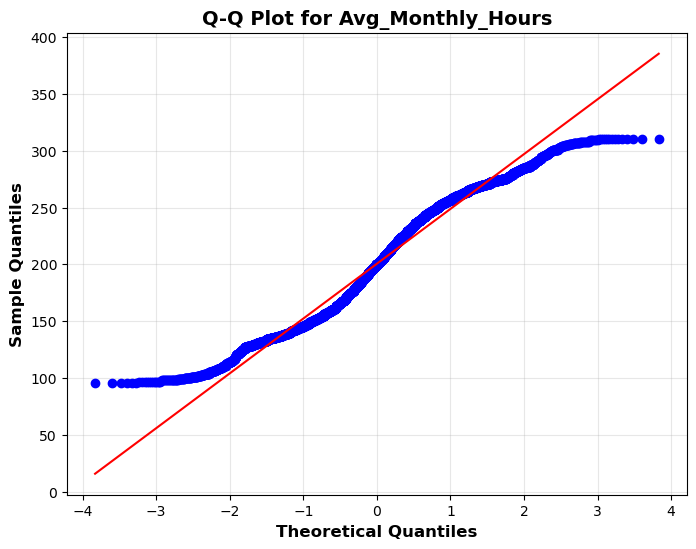

In [107]:
# Q-Q plot for 'Avg_Monthly_Hours' column.
variable = 'Avg_Monthly_Hours'
plt.figure(figsize=(8, 6))
stats.probplot(df[variable], dist="norm", plot=plt)
plt.title('Q-Q Plot for Avg_Monthly_Hours', fontweight='bold', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontweight='bold', fontsize=12)
plt.ylabel('Sample Quantiles', fontweight='bold', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Shapiro-Wilk test

In [109]:
# Shapiro-Wilk test for normality on multiple variables and prints whether each variable follows a normal distribution based on the p-value.
variables = ['Satisfaction', 'Last_Eval', 'Avg_Monthly_Hours', 'Tenure(Years)']
for variable in variables:
    stat, p_value = shapiro(df[variable])
    if p_value > 0.05:
        print(f"{variable} appears to follow a normal distribution (p = {p_value:.4f}).")
    else:
        print(f"{variable} does not follow a normal distribution (p = {p_value:.4f}).")

Satisfaction does not follow a normal distribution (p = 0.0000).
Last_Eval does not follow a normal distribution (p = 0.0000).
Avg_Monthly_Hours does not follow a normal distribution (p = 0.0000).
Tenure(Years) does not follow a normal distribution (p = 0.0000).


/Users/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10872.
  res = hypotest_fun_out(*samples, **kwds)


### Crosstabulation

In [111]:
# The crosstab shows the distribution of salary levels across departments, including totals.
crosstab_dept_salary = pd.crosstab(df['Dept'], df['Salary'], margins=True, margins_name="Total")
print(crosstab_dept_salary)

Salary       high   low  medium  Total
Dept                                  
IT             66   431     368    865
RandD          44   304     311    659
accounting     58   280     247    585
hr             38   287     254    579
management     31   127     131    289
marketing      50   278     268    596
product_mng    43   286     245    574
sales         217  1416    1267   2900
support       119   806     774   1699
technical     152  1071     903   2126
Total         818  5286    4768  10872


### Joint Plot

<Figure size 800x600 with 0 Axes>

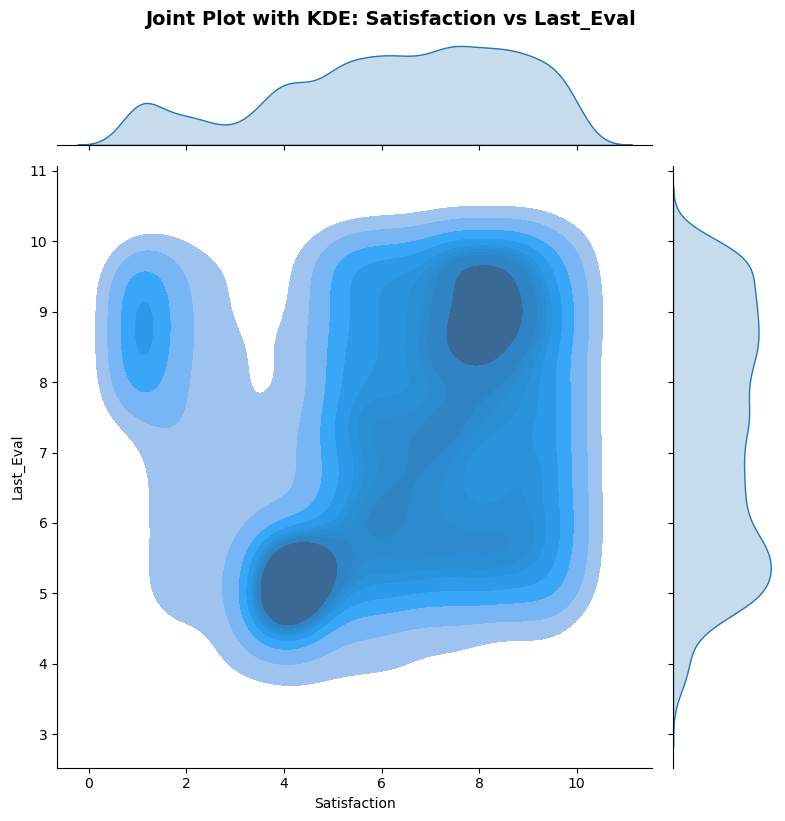

In [113]:
# Joint plot visualizes the relationship between satisfaction and performance evaluations.
plt.figure(figsize=(8, 6))
sns.jointplot(data=df, x='Satisfaction', y='Last_Eval', kind='kde', height=8, fill=True)
plt.suptitle("Joint Plot with KDE: Satisfaction vs Last_Eval", y=1.02, fontweight = 'bold', fontsize = 14)
plt.show()

### Log Transformation

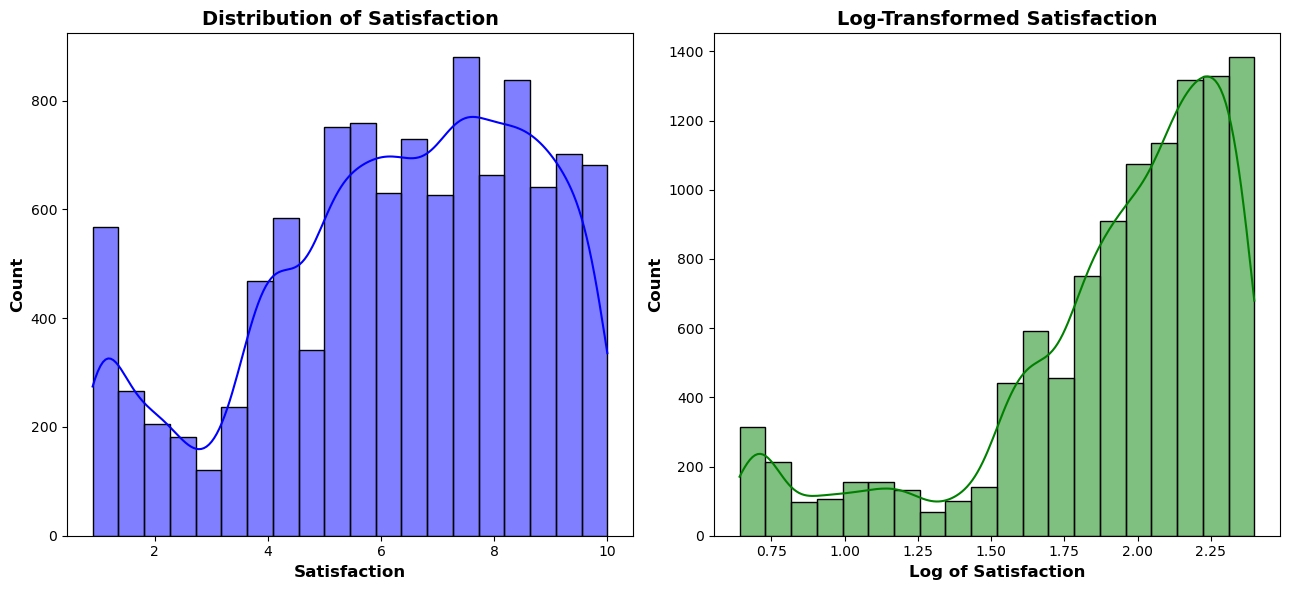

In [115]:
# compares the original and log-transformed distribution of the 'Satisfaction' column using histograms and KDE
column = 'Satisfaction'
df['Log_' + column] = np.log1p(df[column])
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[column], kde=True, color='blue', bins=20)
plt.title('Distribution of Satisfaction', fontsize=14, fontweight='bold')
plt.xlabel(column, fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold',fontsize=12)
plt.subplot(1, 2, 2)
sns.histplot(df['Log_' + column], kde=True, color='green', bins=20)
plt.title('Log-Transformed Satisfaction', fontweight='bold',fontsize=14)
plt.xlabel('Log of ' + column, fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

### Clustering

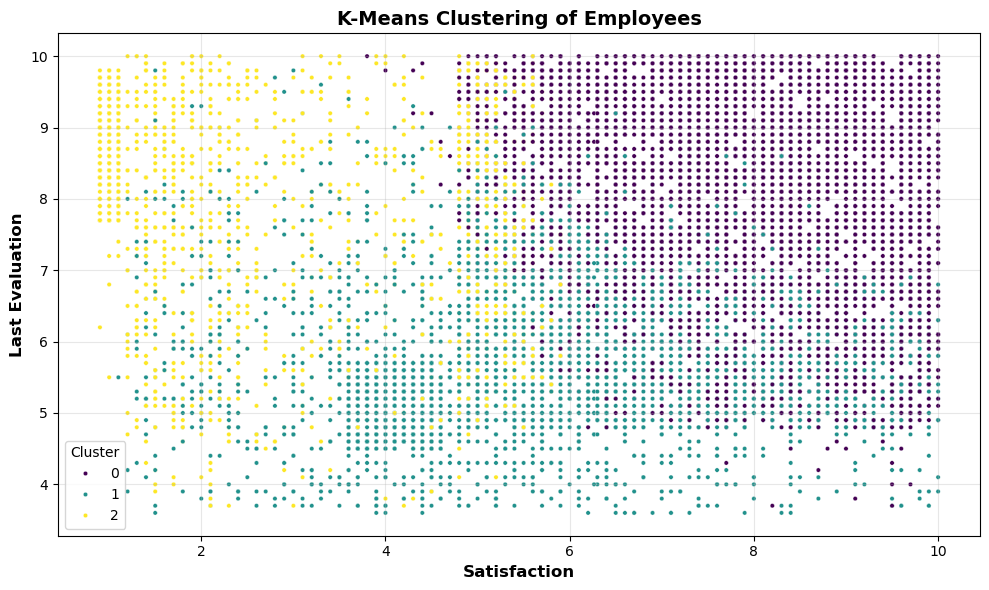

In [117]:
# K-Means clustering using a scatter plot with 'Satisfaction' and 'Last Evaluation'.
features = df[['Satisfaction', 'Last_Eval', 'Avg_Monthly_Hours']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Satisfaction'],
    y=df['Last_Eval'],
    hue=df['Cluster'],
    palette='viridis',
    s=10
)
plt.title('K-Means Clustering of Employees', fontweight='bold', fontsize=14)
plt.xlabel('Satisfaction', fontweight='bold', fontsize=12)
plt.ylabel('Last Evaluation', fontweight='bold', fontsize=12)
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()